# Real life problem: Predicting resale flat prices
### lower MSE means better
### lower RMSE means better
### lower MAE means better
### R2 neareer to 1 means better fit

## Reading csv file

In [1]:
import pandas as pd

# Read the file using Pandas
data = pd.read_csv('C:/Users/Admin/Downloads/Telegram Desktop/kash_project.csv')
print(data.head())



     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.

## Data cleaning

In [2]:
import pandas as pd

# Assuming 'data' contains your DataFrame data

# Creating DataFrame 'df' from 'data'
df = pd.DataFrame(data)

# Extracting years and months from 'remaining_lease' and converting to total months
df['lease_years'] = df['remaining_lease'].str.extract('(\d+) years', expand=False).astype(float)
df['lease_months'] = df['remaining_lease'].str.extract('(\d+) months', expand=False).astype(float)
df['lease_years'].fillna(0, inplace=True)
df['lease_months'].fillna(0, inplace=True)
df['remaining_months'] = (df['lease_years'] * 12 + df['lease_months']).astype(int)

# Splitting 'month' column into 'Year' and 'Month'
df[['Year', 'Month']] = df['month'].str.split('-', expand=True)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Convert 'town' column to categorical data type
df['town'] = df['town'].astype('category')

# Convert categorical labels to numerical labels
df['town_label'] = df['town'].cat.codes

# Get the unique town names
town_names = df['town'].cat.categories

# Create a dictionary to map numerical labels to town names
label_to_town = {label: town for label, town in enumerate(town_names)}

# Print the mapping of numerical labels to town names
print("Numerical Label to Town Name Mapping:")
for label, town in label_to_town.items():
    print(f"Label {label}: {town}")

# Dropping unwanted columns
columns_to_drop = ['lease_years', 'lease_months', 'month', 'block', 'street_name', 'storey_range', 'flat_model', 'lease_commence_date', 'remaining_lease', 'Year', 'Month', 'flat_type', 'town']
df.drop(columns=columns_to_drop, inplace=True)

# Displaying the DataFrame
print(df)


Numerical Label to Town Name Mapping:
Label 0: ANG MO KIO
Label 1: BEDOK
Label 2: BISHAN
Label 3: BUKIT BATOK
Label 4: BUKIT MERAH
Label 5: BUKIT PANJANG
Label 6: BUKIT TIMAH
Label 7: CENTRAL AREA
Label 8: CHOA CHU KANG
Label 9: CLEMENTI
Label 10: GEYLANG
Label 11: HOUGANG
Label 12: JURONG EAST
Label 13: JURONG WEST
Label 14: KALLANG/WHAMPOA
Label 15: MARINE PARADE
Label 16: PASIR RIS
Label 17: PUNGGOL
Label 18: QUEENSTOWN
Label 19: SEMBAWANG
Label 20: SENGKANG
Label 21: SERANGOON
Label 22: TAMPINES
Label 23: TOA PAYOH
Label 24: WOODLANDS
Label 25: YISHUN
        floor_area_sqm  resale_price  remaining_months  town_label
0                 44.0      232000.0               736           0
1                 67.0      250000.0               727           0
2                 67.0      262000.0               749           0
3                 68.0      265000.0               744           0
4                 67.0      265000.0               749           0
...                ...           ...

## Linear Regression

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Squared Error: 16217908993.805225
Root Mean Squared Error: 127349.55435259765
Mean Absolute Error: 95481.43861008021
R-squared (R2) Score: 0.4509934674970686
Predicted price for the new house: [289215.55426954]


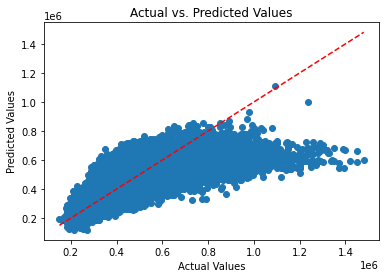

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Now 'town_label' contains numerical labels for 'town'
X = df[['floor_area_sqm', 'remaining_months', 'town_label']]
y = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

# Optionally, make predictions for new data
# Example of using the model to predict house prices for new data
new_house_features = [[50.0, 736, 3]]  # Example features for a new house in 'ANG MO KIO'
predicted_price = model.predict(new_house_features)
print("Predicted price for the new house:", predicted_price)

# Visualize predictions vs. actual values (optional)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

## Decision Tree

Mean Squared Error: 4636823679.206517
Root Mean Squared Error: 68094.22647483792
Mean Absolute Error: 47266.23705676397
R-squared (R2) Score: 0.8430348517234239
Predicted price for the new house: [305000.]


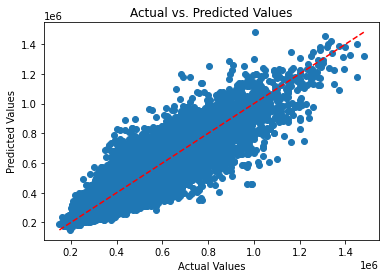

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Now 'town_label' contains numerical labels for 'town'
X = df[['floor_area_sqm', 'remaining_months', 'town_label']]
y = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

# Optionally, make predictions for new data
# Example of using the model to predict house prices for new data
new_house_features = [[50.0, 736, 0]]  # Example features for a new house in 'ANG MO KIO'
predicted_price = model.predict(new_house_features)
print("Predicted price for the new house:", predicted_price)

# Visualize predictions vs. actual values (optional)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## Neural Network 

Epoch 1/50


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 614us/step - loss: 240636919808.0000 - val_loss: 43237703680.0000
Epoch 2/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - loss: 28798793728.0000 - val_loss: 17248950272.0000
Epoch 3/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 591us/step - loss: 16558428160.0000 - val_loss: 15896418304.0000
Epoch 4/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 579us/step - loss: 15377805312.0000 - val_loss: 15530497024.0000
Epoch 5/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 579us/step - loss: 15230530560.0000 - val_loss: 15266046976.0000
Epoch 6/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 581us/step - loss: 15039054848.0000 - val_loss: 15066413056.0000
Epoch 7/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 635us/step - loss: 14699985920.0000 - val_loss: 14913713152.0000
Epoch 8/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 695us/step - loss: 14661511168.0000 - val_loss: 14796556288.0000
Epoch 9/50
4342/4342 ━━━━━━━━━━━━━━━━━━━━ 3s 658us/step - loss: 14580150272.0000 - val_loss: 14697947136.0000
Epoch 10/50
4342/434

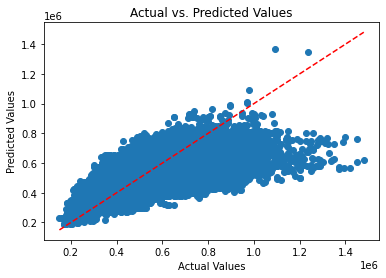

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping  # Import EarlyStopping from Keras

# Now 'town_label' contains numerical labels for 'town'
X = df[['floor_area_sqm', 'remaining_months', 'town_label']]
y = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with a single neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
predictions = model.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

# Optionally, make predictions for new data
# Example of using the model to predict house prices for new data
new_house_features = [[50.0, 736, 0]]  # Example features for a new house in 'ANG MO KIO'
new_house_features_scaled = scaler.transform(new_house_features)
predicted_price = model.predict(new_house_features_scaled)
print("Predicted price for the new house:", predicted_price)

# Visualize predictions vs. actual values (optional)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()
